# Desafío - Dimensionalidad y Agrupación (II)
## Desafío 1: Preparación del ambiente de trabajo
Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas
de álbumes.
- Las imágenes se encuentran en una carpeta con el nombre album_covers
- Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg .
El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de
colores.
Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
- Comencemos por incluír las librerías clásicas: pandas , numpy y matplotlib.pyplot .
- sklearn.cluster.KMeans : para extraer los principales componentes de una matriz numérica.
- skimage.io : Para poder ingresar y leer imágenes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io

import warnings 
warnings.filterwarnings(action='ignore')


## Desafío 2: Importación de imagenes
- Comencemos por ingresar una imágen a nuestro ambiente de trabajo. Para ello ocuparemos io.imread . ¿Qué devuelve?
- Para visualizar la imágen en el notebook, ocupe io.imshow .

In [2]:
! dir album_covers

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 80C1-8572

 Directorio de C:\Users\egonz\OneDrive\Escritorio\Desafios\Unidad 2\clase14u2\album_covers

08-06-2019  11:04    <DIR>          .
08-06-2019  11:04    <DIR>          ..
24-09-2018  13:45             6.148 .DS_Store
24-09-2018  13:45           300.260 alt-j-this-is-all-yours.jpg
24-09-2018  13:45            94.751 altar-of-plagues-teethed-glory-and-injury.jpg
24-09-2018  13:45           147.352 avalanches-since-i-left-you.jpg
24-09-2018  13:45            62.222 backstreet-boys-millenium.jpg
24-09-2018  13:45            42.512 big-krit-4eva-is-a-mighty.webp
24-09-2018  13:45           173.614 britney-spears-baby-one-more-time.jpg
24-09-2018  13:45           158.334 brockhampton-saturation-ii.jpg
24-09-2018  13:45            34.730 car-bomb-meta.jpg
24-09-2018  13:45            49.463 carly-rae-jepsen-emotion-side-b.jpg
24-09-2018  13:45           916.944 carly-rae-jepsen-emotion.png
24-09-2018  1

In [3]:
imagen = io.imread('car-bomb-meta.jpg')

In [4]:
imagen

array([[[17, 24, 34],
        [17, 24, 34],
        [17, 24, 34],
        ...,
        [35, 39, 42],
        [35, 39, 42],
        [35, 39, 42]],

       [[17, 24, 34],
        [17, 24, 34],
        [17, 24, 34],
        ...,
        [35, 39, 42],
        [35, 39, 42],
        [35, 39, 42]],

       [[17, 24, 34],
        [17, 24, 34],
        [17, 24, 34],
        ...,
        [35, 39, 42],
        [35, 39, 42],
        [35, 39, 42]],

       ...,

       [[17, 24, 34],
        [17, 24, 34],
        [17, 24, 34],
        ...,
        [35, 39, 42],
        [35, 39, 42],
        [35, 39, 42]],

       [[17, 24, 34],
        [17, 24, 34],
        [17, 24, 34],
        ...,
        [35, 39, 42],
        [35, 39, 42],
        [35, 39, 42]],

       [[17, 24, 34],
        [17, 24, 34],
        [17, 24, 34],
        ...,
        [35, 39, 42],
        [35, 39, 42],
        [35, 39, 42]]], dtype=uint8)

In [5]:
imagen.shape

(700, 700, 3)

In [6]:
type(imagen)

numpy.ndarray

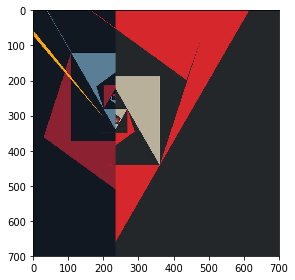

In [7]:
io.imshow(imagen)

## Desafío 3: Preprocesamiento de imágenes y KMeans
- Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales mediante shape.
- Posteriormente redimensionaremos la imágen con reshape .
- Partamos por inicializar nuestro algoritmo KMeans con un k=8 , ¿Qué significará esto?
- Vuelva a implementar el mismo algoritmo con MiniBatchKMeans . ¿Qué diferencia existe con KMeans ?


In [8]:
imagen[0][0]# genera un un cubo representacion numerica del la imagen

array([17, 24, 34], dtype=uint8)

In [10]:
height, width, dims= imagen.shape  # funciona solo en numpay

In [11]:
reshape_imagen = imagen.reshape(height * width, dims)

In [12]:
modelo_km = KMeans(n_clusters =8)

In [13]:
modelo_km.fit(reshape_imagen)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
modelo_km.cluster_centers_

array([[183.64221557, 175.67702096, 154.87874252],
       [ 35.05328179,  39.02024392,  42.05297422],
       [214.07887559,  39.01479265,  44.05345116],
       [140.29262015,  33.50231249,  48.94092097],
       [ 16.90848643,  23.98611067,  33.87575237],
       [ 90.28091201, 125.07794992, 148.20101335],
       [245.054     , 163.102     ,  11.32533333],
       [ 84.35317238,  39.05334082,  40.56765862]])

## Desafío 4: Extracción de valores
- Ahora extraeremos las etiquetas predichas con labels_ . Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en éstos, debemos extraer los valores de los centroides.
- Para extraer los centroides (valores característicos), utilicemos el atributo cluster_centers_ .
- Con las etiquetas, generaremos un conteo de ocurrencia con np.unique . Para extraer el conteo, debemos implementar la opción return_counts=True .


In [15]:
centro_extraido = modelo_km.cluster_centers_
new_colors_pred = modelo_km.cluster_centers_[
    modelo_km.predict(reshape_imagen)].astype(int)

In [16]:
new_colors_pred

array([[16, 23, 33],
       [16, 23, 33],
       [16, 23, 33],
       ...,
       [35, 39, 42],
       [35, 39, 42],
       [35, 39, 42]])

In [17]:
unique, count = np.unique(modelo_km.labels_, return_counts = True)

In [18]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7])

In [19]:
count

array([ 18704, 234093,  71860,  24866, 126932,  10263,   1500,   1782],
      dtype=int64)

In [20]:
modelo_km.labels_.shape

(490000,)

## Desafío 5: Conversión rgb a hex
- Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con map por cada centroide.

In [21]:
def rgb_hex_it(rgb):
    tmp= list(map(lambda x:  int(x), rgb))
    return '#%02x%02x%02x' % (tmp[0], tmp[1], tmp[2])

In [22]:
hex_holder = list(map(lambda x: rgb_hex_it(x), centro_extraido))

In [23]:
np.unique(hex_holder)
#type(hex_holder)

array(['#101721', '#23272a', '#542728', '#5a7d94', '#8c2130', '#b7af9a',
       '#d6272c', '#f5a30b'], dtype='<U7')

## Desafío 6: Definición de base
Ahora generaremos un DataFrame con las siguientes variables:
- El color hex .
- La ocurrencia del color en cada pixel count .
- El porcentaje de ocurrencia de cada color respecto a cluster_centers_ .
Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.


In [24]:
demo = pd.concat([pd.Series(hex_holder), pd.Series(count)],axis=1)

demo.columns=['hex', 'count']

demo['percentage']= demo ['count']/ np.sum(demo['count'])
demo=demo.sort_values(by='percentage', ascending = False)
demo

,hex,count,percentage
1,#23272a,234093,0.477741
4,#101721,126932,0.259045
2,#d6272c,71860,0.146653
3,#8c2130,24866,0.050747
0,#b7af9a,18704,0.038171
5,#5a7d94,10263,0.020945
7,#542728,1782,0.003637
6,#f5a30b,1500,0.003061


## Desafío 7: Visualización
Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar
coloreadas con el color inferido

<BarContainer object of 8 artists>

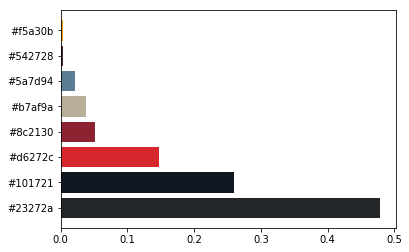

In [25]:
plt.barh(demo['hex'],demo['percentage'], color =demo['hex'])

## Vuelva a implementar el mismo algoritmo con MiniBatchKMeans. ¿Qué diferencia existe con KMeans?

In [38]:
modelo_MiniBatchKmeans = MiniBatchKMeans(n_clusters = 8)
modelo_MiniBatchKmeans

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [39]:
modelo_MiniBatchKmeans.fit(reshape_imagen)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [40]:
modelo_MiniBatchKmeans.cluster_centers_

array([[ 35.12537764,  38.95619335,  41.98942598],
       [214.29545455,  38.98181818,  43.86818182],
       [183.88888889, 176.26666667, 155.31111111],
       [139.33802817,  33.        ,  48.85915493],
       [247.33333333, 166.16666667,   8.33333333],
       [ 16.7877095 ,  24.11731844,  33.75698324],
       [ 90.02941176, 125.85294118, 149.64705882],
       [ 72.75      ,  89.75      ,  99.5       ]])

In [41]:
modelo_MiniBatchKmeans.cluster_centers_.shape

(8, 3)

In [42]:
extract_center = modelo_MiniBatchKmeans.cluster_centers_ # los canales rgd solo funcionan con número enteros
new_colors_pred = modelo_MiniBatchKmeans.cluster_centers_[
    modelo_MiniBatchKmeans.predict(reshape_imagen)].astype(int)

In [43]:
new_colors_pred
unique ,count = np.unique(modelo_MiniBatchKmeans.labels_,return_counts= True)

In [44]:
unique # clases son unicas de etiquetas
count  # cantidad de ocurrencias de las etiquetas
modelo_MiniBatchKmeans.labels_.shape  # frecuencia total de ocurrencias

(490000,)

In [45]:
hex_holder = list(map(lambda x: rgb_hex_it(x), extract_center))

In [46]:
np.unique(hex_holder)

array(['#101821', '#232629', '#485963', '#5a7d95', '#8b2130', '#b7b09b',
       '#d6262b', '#f7a608'], dtype='<U7')

In [49]:
demo2 = pd.concat([pd.Series(hex_holder),pd.Series(count)], axis=1)

demo2.columns =['hex', 'count']

demo2['percentage'] = demo2 ['count'] /np.sum(demo2 ['count'])
demo2 = demo2.sort_values(by= 'percentage', ascending= False)
demo2

,hex,count,percentage
0,#232629,234693,0.478965
5,#101821,126941,0.259063
1,#d6262b,71869,0.146671
3,#8b2130,25655,0.052357
2,#b7b09b,18704,0.038171
6,#5a7d95,9905,0.020214
4,#f7a608,1493,0.003047
7,#485963,740,0.001510


<BarContainer object of 8 artists>

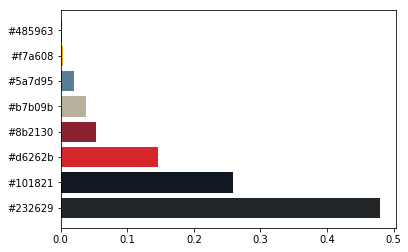

In [50]:
plt.barh(demo2 ['hex'], demo2 ['percentage'], color =demo2  ['hex']  )

In [53]:
demo == demo2

,hex,count,percentage
0,True,True,True
5,True,True,True
1,True,True,True
3,True,True,True
2,True,True,True
6,True,True,True
4,True,True,True
7,True,True,True


In [ ]:
# para el resultado final no hay diferencias entre ambos modelos